# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
plt.style.use(['seaborn-whitegrid'])

In [15]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [56]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [57]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [58]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [59]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.975
평가 데이터 점수 : 0.9666666666666667


In [61]:
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [62]:
print('학습 데이터 점수 : {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.95
평가 데이터 점수 : 0.9666666666666667


In [31]:
cross_validate(
    estimator = KNeighborsClassifier(),
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099826, 0.        , 0.00099874, 0.00099707, 0.00099707]),
 'score_time': array([0.00209975, 0.00209975, 0.0030992 , 0.00199485, 0.00199485]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [32]:
param_grid = [{'n_neighbors' : [3, 5, 7],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['ball_tree,', 'kd_tree', 'brute']}]

In [33]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [34]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.96666667 0.96666667 0.97333333 0.96666667 0.98       0.98
 0.96666667 0.96666667 0.97333333 0.96666667 0.98       0.98      ]
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid=[{'algorithm': ['ball_tree,', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [35]:
gs.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 7, 'weights': 'uniform'}

In [36]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9800000000000001


In [52]:
def make_meshgrid(x, y, h= .2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [39]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

In [41]:
iris_comp_df = pd.DataFrame(data = X_comp)
iris_comp_df['Target'] = y
iris_comp_df.tail(3)

,0,1,Target
147,-3.971954,8.492065,2
148,-2.200039,8.223678,2
149,-7.443063,8.358597,2


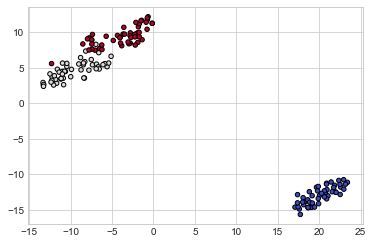

In [43]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
           c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

In [45]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

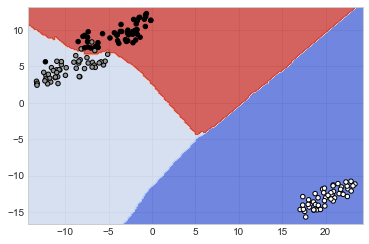

In [54]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, s = 20, edgecolors = 'k');

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 캘리포니아 주택 가격 데이터

In [64]:
california = fetch_california_housing()
california_df = pd.DataFrame(data = california.data, columns = california.feature_names)
california_df['Target'] = california.target
california_df.tail(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [65]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [66]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [69]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [70]:
print('학습 데이터 점수 : {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.7992359585690995
평가 데이터 점수 : 0.6606229026707986


In [71]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [72]:
cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.5s finished


{'fit_time': array([0.05375433, 0.08617854, 0.05891442, 0.06957674, 0.06761003]),
 'score_time': array([0.67399716, 0.51902008, 0.58313823, 0.7078166 , 0.59860063]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [73]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [74]:
param_grid = [{'model__n_neighbors' : [3, 5, 7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [75]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [76]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=4,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [77]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [78]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.5376515274379832


In [80]:
tsne = TSNE(n_components = 1)
X_comp = tsne.fit_transform(X)

In [81]:
california_comp_df = pd.DataFrame(data = X_comp)
california_comp_df['target'] = y
california_comp_df.tail(3)

,0,target
20637,-45.368729,0.923
20638,-29.251490,0.847
20639,-20.664104,0.894


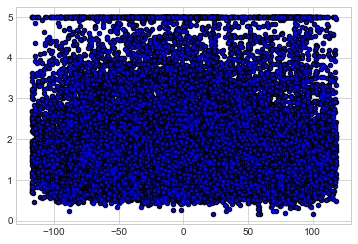

In [82]:
plt.scatter(X_comp, y, c = 'b', s = 20, edgecolors = 'k');

In [83]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

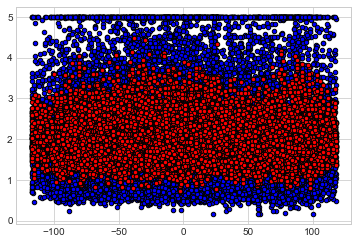

In [84]:
plt.scatter(X_comp, y, c = 'b', s = 20, edgecolors = 'k')
plt.scatter(X_comp, predict, c = 'r', s = 20, edgecolors = 'k');